In [1]:
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from warnings import filterwarnings
import pymysql
filterwarnings('ignore', category=pymysql.Warning)
import json
from sqlalchemy.orm import Session
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from flask import Flask
from flask import jsonify

Step 3 - Climate Analysis and Exploration

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [3]:
class Measurement(Base):
    __tablename__ = "Measurement"
    id = Column(Integer, primary_key=True)
    station = Column(Integer)
    date = Column(Integer)
    prcp = Column(Integer)
    tobs = Column(Integer)
    
class Station(Base):
    __tablename__ = "Station"
    id = Column(Integer, primary_key=True)
    station = Column(Integer)
    name = Column(String(255))
    latitude = Column(Integer)
    longitude = Column(Integer)    
    elevation = Column(Integer)  

In [4]:
Base.metadata.create_all(engine)
session = Session(bind=engine)

In [5]:
session.commit()

In [6]:
hawaii_measurements = os.path.join("hawaii", "hawaii_measurements_clean.csv")
hawaii_stations = os.path.join("hawaii", "hawaii_stations_clean.csv")
hawaii_measurements_df = pd.read_csv(hawaii_measurements)
hawaii_stations_df = pd.read_csv(hawaii_stations)

In [7]:
measurements = hawaii_measurements_df

In [8]:
stations = hawaii_stations_df

In [9]:
measu_dict = measurements.to_dict(orient='records')

In [10]:
station_dict = stations.to_dict(orient='records')

In [11]:
connection = engine.connect()

In [12]:
connection.execute(Measurement.__table__.insert(), measu_dict)

In [13]:
engine.execute('select * from Measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0, 63),
 (3, 'USC00519397', '2010-01-03', 0, 74),
 (4, 'USC00519397', '2010-01-04', 0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [14]:
connection.execute(Station.__table__.insert(), station_dict)

In [15]:
engine.execute('select * from Station limit 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

Precipitation Analysis:

In [57]:
# engine.execute('select date, prcp from Measurement Where date >= "2016-07-30"').fetchall()

In [17]:
current_year = engine.execute('select date, prcp from Measurement Where date >= "2016-07-30"').fetchall()

In [18]:
# current_year

In [19]:
current_year_df = pd.DataFrame(current_year)
current_year_df.head(2)

,0,1
0,2016-07-30,0.00
1,2016-07-31,0.06


In [20]:
current_year_df.rename(columns={0: "date", 1: "prcp"}, inplace=True)
current_year_df.head(2)

,date,prcp
0,2016-07-30,0.00
1,2016-07-31,0.06


In [21]:
current_year_df = current_year_df.set_index("date")

In [22]:
current_year_df.head(2)

,prcp
date,
2016-07-30,0.00
2016-07-31,0.06


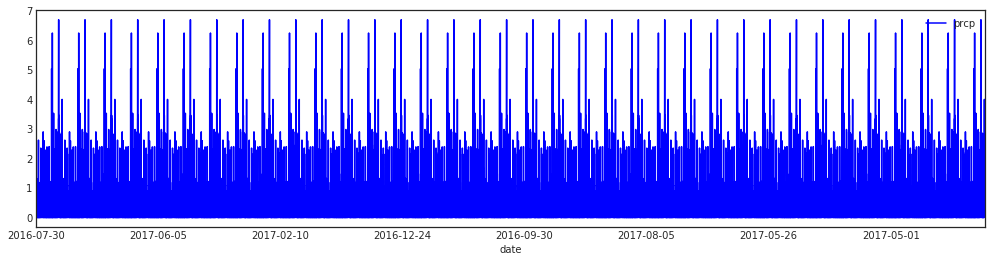

In [23]:
with plt.style.context("seaborn-white"):
    current_year_df.plot(figsize=(17,4), color='blue')
plt.show()

In [24]:
months = session.query(Measurement)
# for date in months:
#     print(date.prcp, " - ", date.date)

Station Analysis:

In [25]:
engine.execute('select station, COUNT(name) from Station GROUP BY station ORDER BY (name) DESC').fetchall()

[('USC00519523', 35),
 ('USC00519397', 35),
 ('USC00519281', 35),
 ('USC00518838', 35),
 ('USC00517948', 35),
 ('USC00516128', 35),
 ('USC00514830', 35),
 ('USC00513117', 35),
 ('USC00511918', 35)]

In [26]:
engine.execute('select station, COUNT(tobs) from Measurement GROUP BY station ORDER BY (tobs) DESC').fetchall()

[('USC00514830', 69732),
 ('USC00519523', 92592),
 ('USC00519397', 96660),
 ('USC00517948', 24588),
 ('USC00519281', 99792),
 ('USC00513117', 97056),
 ('USC00516128', 89424),
 ('USC00518838', 12312),
 ('USC00511918', 69552)]

In [27]:
engine.execute('select station, name, tobs, COUNT(tobs) from Measurement m join Station s using(station) GROUP BY station ORDER BY (tobs) DESC').fetchall()

[('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 82, 2440620),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 82, 3240720),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 81, 3383100),
 ('USC00517948', 'PEARL CITY, HI US', 80, 860580),
 ('USC00519281', 'WAIHEE 837.5, HI US', 79, 3492720),
 ('USC00513117', 'KANEOHE 838.1, HI US', 77, 3396960),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 76, 3129840),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 74, 430920),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 64, 2434320)]

In [28]:
# engine.execute('select station, COUNT(tobs) from Measurement GROUP BY station where tobs = "24948"').fetchall()

In [29]:
engine.execute('select station, date, name, tobs, COUNT(tobs) from Measurement m join Station s using(station) GROUP BY station ORDER BY (tobs) DESC').fetchall()

[('USC00514830', '2017-08-23', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 82, 2440620),
 ('USC00519523', '2017-08-23', 'WAIMANALO EXPERIMENTAL FARM, HI US', 82, 3240720),
 ('USC00519397', '2017-08-23', 'WAIKIKI 717.2, HI US', 81, 3383100),
 ('USC00517948', '2017-07-28', 'PEARL CITY, HI US', 80, 860580),
 ('USC00519281', '2017-08-18', 'WAIHEE 837.5, HI US', 79, 3492720),
 ('USC00513117', '2017-07-31', 'KANEOHE 838.1, HI US', 77, 3396960),
 ('USC00516128', '2017-08-23', 'MANOA LYON ARBO 785.2, HI US', 76, 3129840),
 ('USC00518838', '2015-10-20', 'UPPER WAHIAWA 874.3, HI US', 74, 430920),
 ('USC00511918', '2015-10-30', 'HONOLULU OBSERVATORY 702.2, HI US', 64, 2434320)]

In [30]:
station_tobs = engine.execute('select station, tobs from Measurement Where date >= "2016-07-30" ORDER BY (tobs) DESC').fetchall()

In [31]:
station_tobs_df = pd.DataFrame(station_tobs)

In [32]:
station_tobs_df.head(2)

,0,1
0,USC00519397,87
1,USC00519397,87


In [33]:
station_tobs_df.rename(columns={0: "station", 1: "tobs"}, inplace=True)
station_tobs_df.head(2)

,station,tobs
0,USC00519397,87
1,USC00519397,87


In [34]:
station_tobs_df = station_tobs_df.set_index("station")

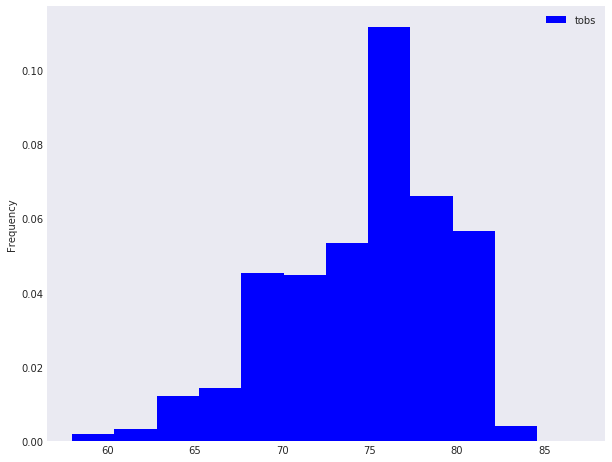

In [35]:
with plt.style.context("seaborn-dark"):
    station_tobs_df.plot.hist(stacked=True, normed=True, color='blue', bins=12, figsize=(10, 8))
plt.show()

Temperature Analysis:

In [36]:
calc_temps = engine.execute('select date, tobs from Measurement Where date >= "2016-07-30" ORDER BY (tobs) DESC').fetchall()

In [37]:
avg_total = engine.execute('select MAX (tobs), MIN(tobs), AVG(tobs) from Measurement').fetchall()

In [38]:
avg_total_df = pd.DataFrame(avg_total)

In [39]:
avg_total_df.head(2)

,0,1,2
0,87,53,72.994863


In [40]:
avg_total_df.rename(columns={0: "Max", 1: "Min", 2: "Average"}, inplace=True)
avg_total_df.head(2)

,Max,Min,Average
0,87,53,72.994863


In [41]:
calc_temps_df = pd.DataFrame(calc_temps)

In [42]:
calc_temps_df.head(2)

,0,1
0,2017-05-23,87
1,2017-05-23,87


In [43]:
calc_temps_df.rename(columns={0: "date", 1: "tobs"}, inplace=True)
calc_temps_df.head(2)

,date,tobs
0,2017-05-23,87
1,2017-05-23,87


In [44]:
calc_temps_trip = engine.execute('select MAX (tobs), MIN(tobs), AVG(tobs) from Measurement Where date >= "2016-07-30"').fetchall()

In [45]:
calc_temps_trip = pd.DataFrame(calc_temps_trip)

In [46]:
calc_temps_trip.head(2)

,0,1,2
0,87,58,74.720575


In [47]:
calc_temps_trip.rename(columns={0: "Max", 1: "Min", 2: "Average"}, inplace=True)
calc_temps_trip.head(2)

,Max,Min,Average
0,87,58,74.720575


In [48]:
average = calc_temps_trip.Average

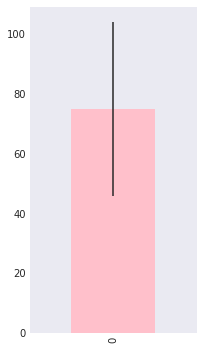

In [49]:
with plt.style.context("seaborn-dark"):
    average.plot.bar(yerr=(29), figsize=(3, 6), color='pink')
plt.show()

Climate App:

In [50]:
# Precipitation
climate_dict = calc_temps_df.to_dict(orient='records')

In [51]:
# Temperature - TOBS
tobs = engine.execute('select date, tobs from Measurement Where date >= "2017-07-30"').fetchall()

In [52]:
tobs_df = pd.DataFrame(tobs)

In [53]:
tobs_df.rename(columns={0: "date", 1: "tobs"}, inplace=True)

In [54]:
tobs_dict = tobs_df.to_dict(orient='records')

In [55]:
# MIN, MAX, AVG
temp_start = calc_temps_trip.to_dict(orient='records')

In [56]:
temp_end = avg_total_df.to_dict(orient='records')

In [ ]:
app = Flask(__name__)

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return precipitation data as json"""
    return jsonify(climate_dict)

@app.route("/api/v1.0/stations")
def station():
    """Return stations data as json"""
    return jsonify(station_dict)

@app.route("/api/v1.0/tobs")
def tobs():
    """Return temperature data as json"""
    return jsonify(tobs_dict)

@app.route("/api/v1.0/start")
def avg():
    """Return tobs data as json"""
    return jsonify(temp_start)

@app.route("/api/v1.0/end")
def max_min():
    """Return tobs data as json"""
    return jsonify(temp_end)

app.run()